### STEPS:
1. understanding the data 
    1. look at the train n test data sets
    2. check the features present in our dataset
    3. check the data types
    4. check the shape of the dataset
2. Univariate analysis - we analyze each variable individually.
    1. categorical variables - count plot -- to calculate the number of each category in a particular variable
        * nominal categorical
        * ordinal categorical
    2. numerical variables - Probability Density Functions(PDF) - to look at the distribution of the numerical variables.
        * discrete numerical
        * continuous numerical
3. Bivariate Analysis - how well each feature correlates with o/p
    1. categorical(nominal+ordinal) vs Target Variable
    2. discrete numerical   vs Target Variable
    3. continous numerical   vs Target Variable
    4. correlation - heat map  vs Target Variable

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv") 
test=pd.read_csv("test.csv")

Let’s make a copy of the train and test data so that even if we change anything in these datasets we would not lose the original datasets.

In [3]:
train_original=train.copy() 
test_original=test.copy()

# 1. understanding the data
1. look at the train n test data sets
2. check the features present in our dataset
3. check the data types
4. check the shape of the dataset

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### observations
1. we can see there Loan_Status is a dependent feature and the rest r independent features
2. we have similar features in the test data as well .except the LoanStatus

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### observations
* we can see 3 formats of data types
    1. object  : categorical variables - Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
    2. int64   : ApplicantIncome
    3. float64 : CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History
     
       
           

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

#### observation
We have 614 rows and 13 columns in the training dataset and 367 rows and 12 columns in the test dataset.

# 2. Univariate Analysis:  
###### we analyze each variable individually.
1. categorical variables - count plot -- to calculate the number of each category in a particular variable
2. numerical variables - Probability Density Functions(PDF) - to look at the distribution of the numerical variables.

### target variable

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

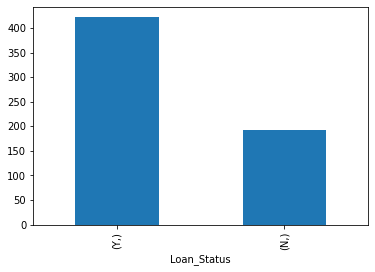

In [10]:
train[['Loan_Status']].value_counts().plot.bar()

#### observation
* 422(around 69%) people out of 614 got the approval.

#### Now, let’s visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.

1. Categorical :
    * Nominal features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
    * Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
2. Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
###### Let’s visualize the categorical features first.

### Categorical - Nominal Features

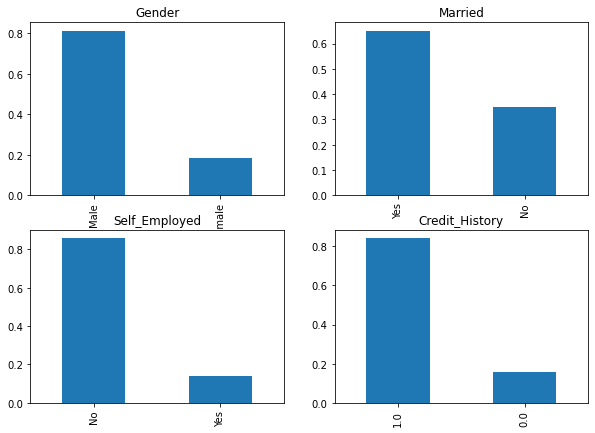

In [11]:
plt.figure(figsize = (10,7))
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar( title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

#### observations:

It can be inferred from the above bar plots that:

* 80% of applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* About 15% of applicants in the dataset are self-employed.
* About 85% of applicants have repaid their debts.

### Categorical - Ordinal

<AxesSubplot:title={'center':'Property_Area'}>

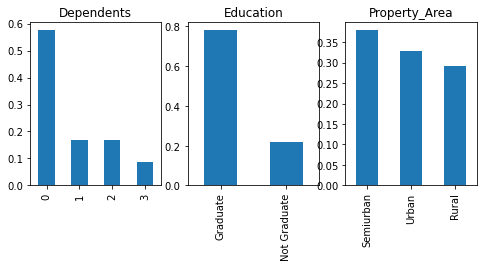

In [67]:
plt.figure(figsize = (8,3)) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

#plt.show()

#### observations:
Following inferences can be made from the above bar plots:

* Most of the applicants don’t have dependents.
* About 80% of the applicants are graduates.
* Most of the applicants are from semi-urban areas.

### Numerical - Continuous 

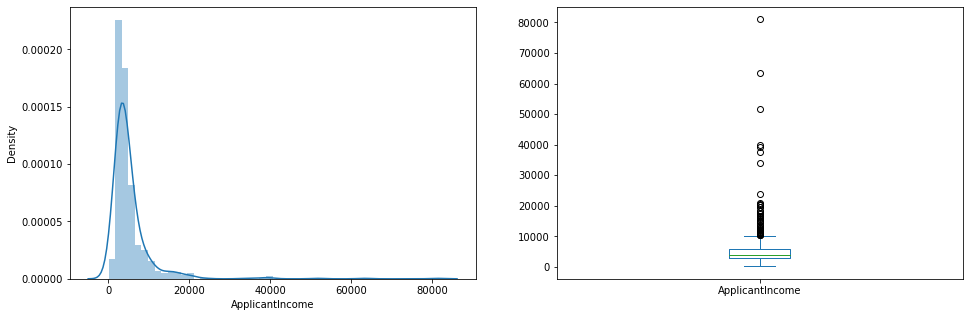

skewness 6.539513113994625


In [13]:
plt.figure(figsize=(16,5)) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box() 
plt.show()
print("skewness" , train['ApplicantIncome'].skew())

#### observation :
It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed (right skewed ) . We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

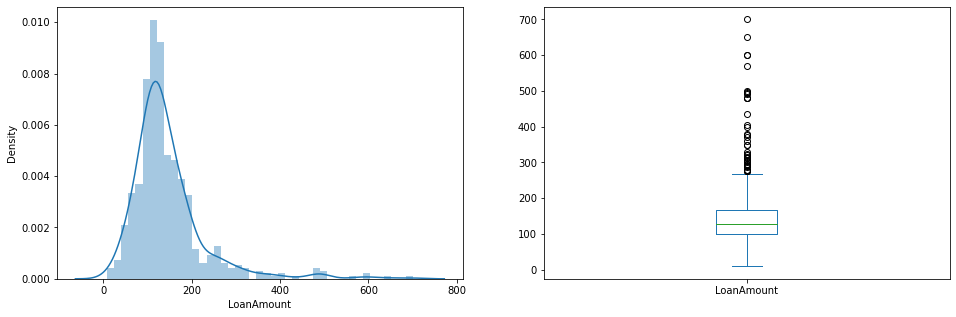

skewness 2.677551679256059


In [14]:
plt.figure(figsize=(16,5)) 
plt.subplot(121)
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box() 
plt.show()
print("skewness" , train['LoanAmount'].skew())

### observation:
We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

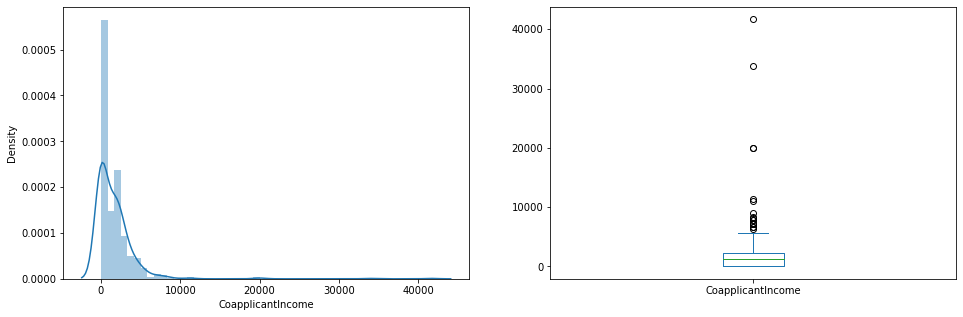

skewness  7.491531216657306


In [15]:
plt.figure(figsize=(16,5)) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122)
train['CoapplicantIncome'].plot.box() 
plt.show()
print("skewness " , train['CoapplicantIncome'].skew())

#### observation:
we can see skewness (right skewed ) and outliers in this variable

### numerical - discrete

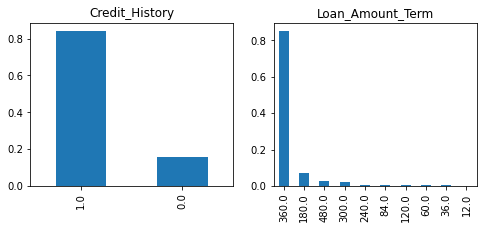

In [16]:
plt.figure(figsize = (8,3))
plt.subplot(121) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.subplot(122) 
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term') 
plt.show()

### observations:
* About 85% of applicants have repaid their debts. --  credit history
* About 85% of applicants have Loan_Amount_Term is 360 months

# 3. Bivariate Analysis - 
### how well each feature correlates with Loan Status
Let’s recall some of the hypotheses that we generated earlier:

* Applicants with high incomes should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.
Let’s try to test the above-mentioned hypotheses using bivariate analysis

### 3a.  Categorical VS Target Variable

<AxesSubplot:title={'center':'LoanStatus % by Gender'}, xlabel='Gender'>

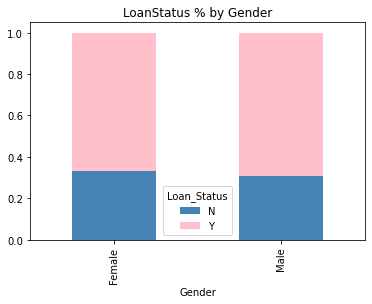

In [17]:
grp = train[["Gender","Loan_Status"]].groupby(by = ["Gender","Loan_Status"])["Loan_Status"].count()
unstacked_grp = grp.unstack()
#divide each row element by the (sum of the columns of that particular row)
df_for_plot = unstacked_grp.div(unstacked_grp.sum(axis=1),axis=0) 
df_for_plot.plot(kind='bar', stacked=True,
            color=['steelblue','pink'], title='LoanStatus % by Gender')


### observation :
It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

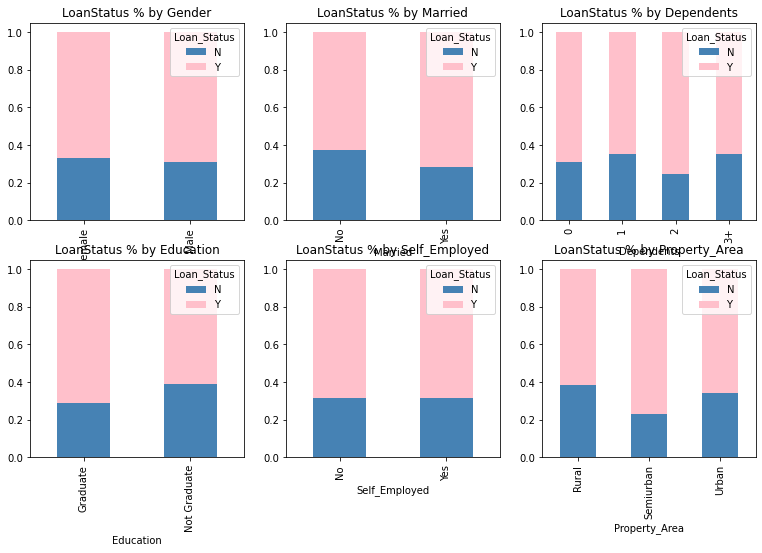

In [18]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
fig, axarr = plt.subplots(2, 3, figsize=(13, 8))
i=0
j=0
for feature in categorical_features:
    grp = train[[feature,"Loan_Status"]].groupby(by = [feature,"Loan_Status"])["Loan_Status"].count()
    unstacked_grp = grp.unstack()
    #divide each row element by the (sum of the columns of that particular row)
    df_for_plot = unstacked_grp.div(unstacked_grp.sum(axis=1),axis=0) 
    
    df_for_plot.plot(kind='bar', stacked=True,color=['steelblue','pink'], title='LoanStatus % by '+feature , ax=axarr[i,j])
    if j==2:
        i=1
        j=0
    else:
        j+=1
    #plt.show()

### observation :
* It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.
* The proportion of married applicants is higher for the approved loans.
* The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* The proportion of graduate applicants is higher for the approved loans
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
* The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

### 3b.  Numerical (Discrete) VS Target Variable

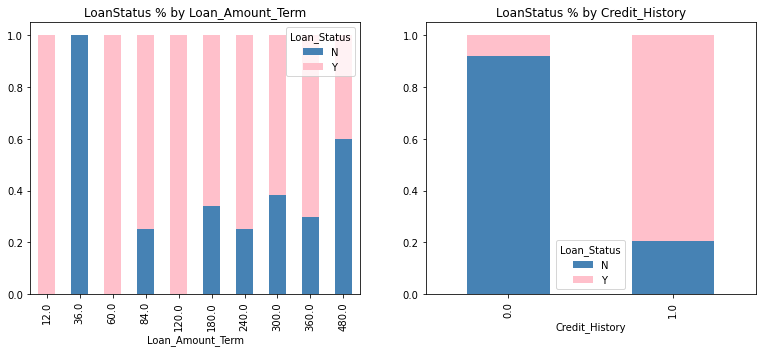

In [19]:
discrete_numerical_features  = ['Loan_Amount_Term', 'Credit_History']
k=0
fig, axarr = plt.subplots(1, 2, figsize=(13, 5))
for feature in discrete_numerical_features:
    grp = train[[feature,"Loan_Status"]].groupby(by = [feature,"Loan_Status"])["Loan_Status"].count()
    unstacked_grp = grp.unstack()
    #divide each row element by the (sum of the columns of that particular row)
    df_for_plot = unstacked_grp.div(unstacked_grp.sum(axis=1),axis=0) 
    df_for_plot.plot(kind='bar', stacked=True,color=['steelblue','pink'], title='LoanStatus % by '+feature , ax=axarr[k] )
    k+=1
    

### observations:
* It seems people with a credit history of 1 are more likely to get their loans approved.

### 3c.  Numerical (continuous) VS Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

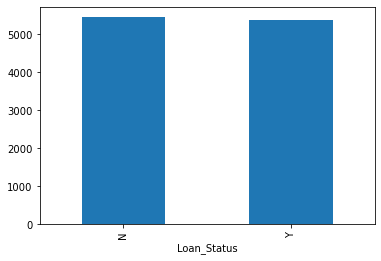

In [44]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

### observation :
Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

Text(0, 0.5, 'Percentage')

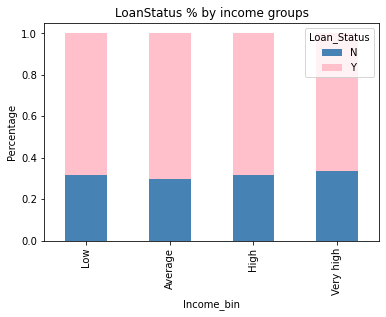

In [46]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
grp = train.groupby(by = ["Income_bin","Loan_Status"])["Loan_Status"].count()
unstacked = grp.unstack()
unstacked.div(unstacked.sum(axis=1),axis=0).plot.bar(stacked = True , color=['steelblue','pink'], title='LoanStatus % by income groups' )
plt.ylabel("Percentage")

### observation:
It can be inferred that Applicant’s income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant’s income is high the chances of loan approval will also be high.

* We will analyze the applicant’s income and loan amount variable in a similar manner.

Text(0, 0.5, 'Percentage')

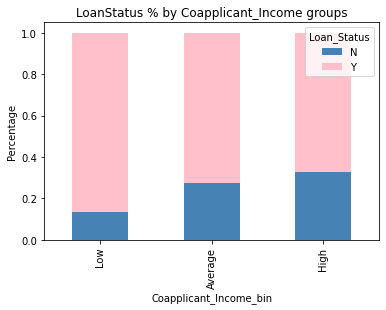

In [47]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
grp = train.groupby(by = ["Coapplicant_Income_bin","Loan_Status"])["Loan_Status"].count()
unstacked = grp.unstack()
unstacked.div(unstacked.sum(axis=1),axis=0).plot.bar(stacked = True , color=['steelblue','pink'], title='LoanStatus % by Coapplicant_Income groups' )
plt.ylabel("Percentage")

### observation :
It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. 

So we can make a new variable in which we will combine the applicant’s and co applicants’ income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

Text(0, 0.5, 'Percentage')

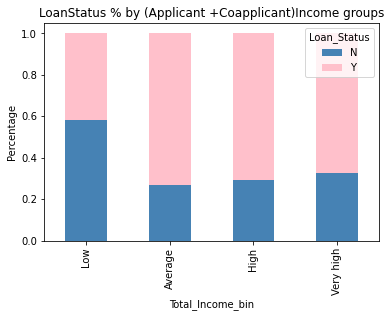

In [50]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
grp = train.groupby(by = ["Total_Income_bin","Loan_Status"])["Loan_Status"].count()
unstacked = grp.unstack()
unstacked.div(unstacked.sum(axis=1),axis=0).plot.bar(stacked = True , color=['steelblue','pink'], title='LoanStatus % by (Applicant +Coapplicant)Income groups' )
plt.ylabel("Percentage")

### observation:
We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.

Let’s visualize the Loan amount variable.

Text(0, 0.5, 'Percentage')

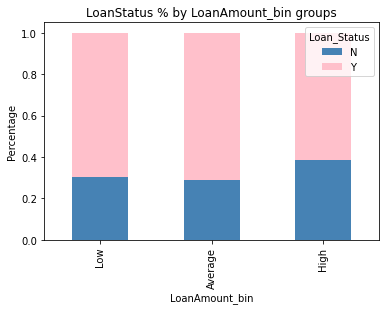

In [52]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
grp = train.groupby(by = ["LoanAmount_bin","Loan_Status"])["Loan_Status"].count()
unstacked = grp.unstack()
unstacked.div(unstacked.sum(axis=1),axis=0).plot.bar(stacked = True , color=['steelblue','pink'], title='LoanStatus % by LoanAmount_bin groups' )
plt.ylabel("Percentage")

### observation:
It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

In [53]:
# lets drop all the newly created columns
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

### 3d. Correlation 
##### using heat maps
Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation.
* numerical variables = ['Loan_Amount_Term', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [58]:
#we will also find the correlation of  Loan_Status with numerical variablles ---- so lets one hot encode loan_Status
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)


<AxesSubplot:>

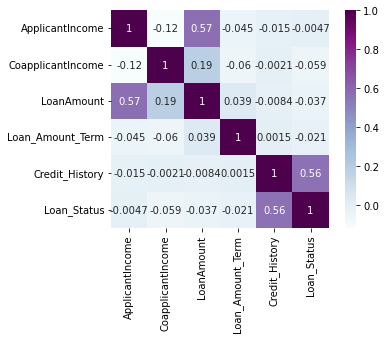

In [62]:
sns.heatmap(train.corr(),square=True , cmap="BuPu" , annot = True)

### observation:
We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status). LoanAmount is also correlated with CoapplicantIncome.